In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

In [2]:
plt.style.use('ggplot')

# Load Dataset

In [3]:
df = pd.read_csv('heart_disease.csv', na_values=["n/a", "na", "--", "?"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [4]:
# Descript data per features
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='fitur tipe_data jumlah_null %_null jumlah_unique unique_sample'.split())
desc_df

,fitur,tipe_data,jumlah_null,%_null,jumlah_unique,unique_sample
0,age,int64,0,0.000000,41,"[63, 67, 37, 41]"
1,sex,int64,0,0.000000,2,"[1, 0]"
2,cp,int64,0,0.000000,4,"[1, 4, 3, 2]"
3,trestbps,int64,0,0.000000,50,"[145, 160, 120, 130]"
4,chol,int64,0,0.000000,152,"[233, 286, 229, 250]"
5,fbs,int64,0,0.000000,2,"[1, 0]"
6,restecg,int64,0,0.000000,3,"[2, 0, 1]"
7,thalach,int64,0,0.000000,91,"[150, 108, 129, 187]"
8,exang,int64,0,0.000000,2,"[0, 1]"
9,oldpeak,float64,0,0.000000,40,"[2.3, 1.5, 2.6, 3.5]"


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


C:\Users\lunox\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lunox\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Plot Distribusi Fitur Thal'), Text(0.5, 0, 'thal')]

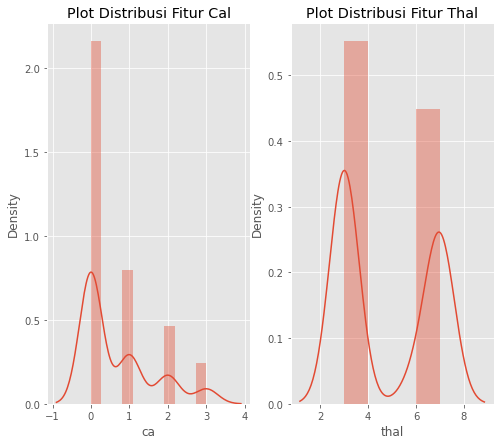

In [6]:
#Plot distribusi fitur yang memiliki null value
plt.figure(figsize=(8,7))
plt.subplot(1, 2, 1)  
sns.distplot(x=df['ca']).set(title='Plot Distribusi Fitur Cal', xlabel='ca')
plt.subplot(1, 2, 2)   
sns.distplot(x=df['thal']).set(title='Plot Distribusi Fitur Thal', xlabel='thal')

In [7]:
#Melakukan imputasi kedua fitur yang memiliki nilai null dengan modus
df['ca'].fillna(df['ca'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

In [8]:
#Membuat kolom label dari kolom num dimana num 0 --> 0 (bukan diabetes) dan selain iti diabetes 
df['label'] = df['pred_attribute'].apply(lambda x: 0 if x == 0  else 1).reset_index(drop=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


In [9]:
display(df['pred_attribute'].value_counts())
display(df['label'].value_counts())

0    164
1     55
2     36
3     35
4     13
Name: pred_attribute, dtype: int64

0    164
1    139
Name: label, dtype: int64

[Text(0.5, 1.0, 'Perbandingan Jumlah Data tiap Label')]

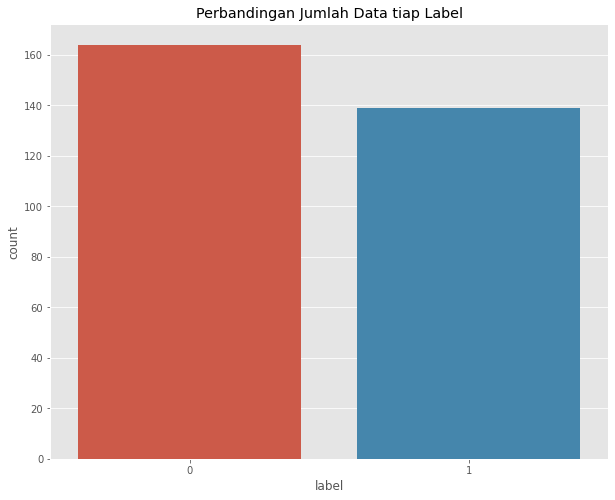

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='label', data=df).set(title='Perbandingan Jumlah Data tiap Label')

<AxesSubplot:>

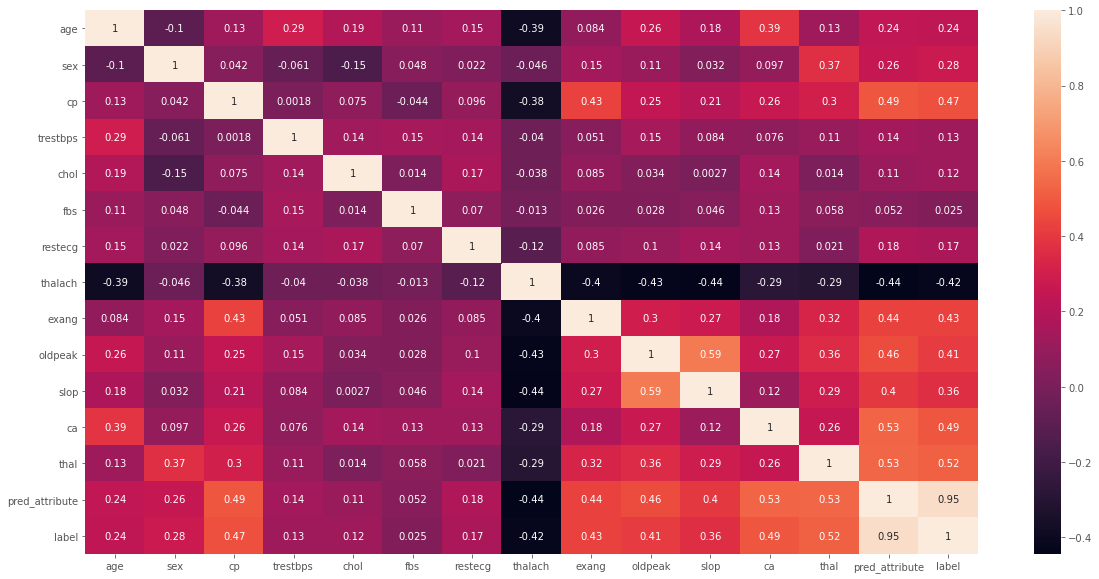

In [11]:
#untuk melihat korelasi fitur terhadap label nya. Terlihat yg memiliki korelasi > 0.5 hanya fitur thal
f, ax = plt.subplots(1, figsize=(20,10))
sns.heatmap(df.corr(method='spearman'), annot=True, ax=ax)

# Melakukan Splitting untuk Data Training & Testing

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

X = df.drop(columns=['pred_attribute','label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(212, 13) (91, 13) (212,) (91,)


In [14]:
print(type(X_train), type(y_train))
print(type(X_test), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [15]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
137,62,1,2,120,281,0,2,103,0,1.4,2,1.0,7.0
106,59,1,4,140,177,0,0,162,1,0.0,1,1.0,7.0
284,61,1,4,148,203,0,0,161,0,0.0,1,1.0,7.0
44,61,0,4,130,330,0,2,169,0,0.0,1,0.0,3.0
139,51,1,3,125,245,1,2,166,0,2.4,2,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,58,1,4,146,218,0,0,105,0,2.0,2,1.0,7.0
192,43,1,4,132,247,1,2,143,1,0.1,2,0.0,7.0
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0
47,50,1,4,150,243,0,2,128,0,2.6,2,0.0,7.0


In [16]:
y_test

225    0
152    0
228    1
201    0
52     1
      ..
253    0
293    1
76     1
272    1
238    0
Name: label, Length: 91, dtype: int64

# 1) Experiment Activation Function

In [17]:
def model_loss(X_train, y_train, X_test, y_test, activation_function):
    
    # define model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation=activation_function))
    model.add(Dense(8, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, 
                        batch_size = 5, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Activation Function='+str(activation_function))
    plt.ylim([0.3, 1])
    plt.legend()

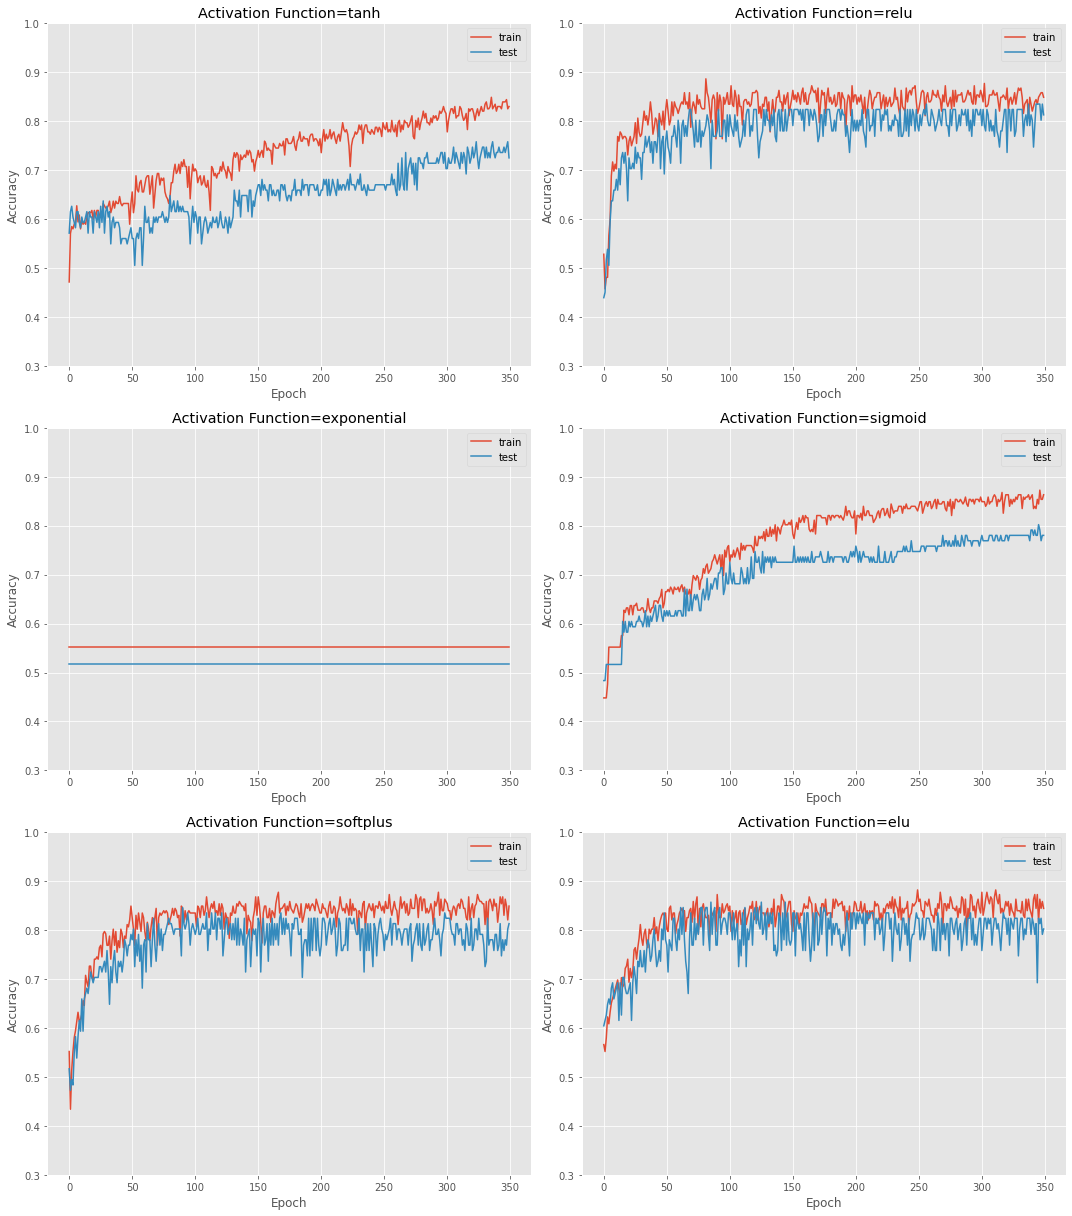

In [18]:
#Epoch experiment
act_func = ['tanh', 'relu', 'exponential', 'sigmoid', 'softplus', 'elu']

plt.figure(figsize=(15,17))

for i in range(len(act_func)):
    plt.subplot(3,2, i+1)
    
    model_loss(X_train, y_train, X_test, y_test, act_func[i])

plt.tight_layout()
plt.show()

## Summary Activation Function
Dari experiment variasi activation function dari tanh hingga elu dapat dilihat bahwa:
1. Dari experiment di atas activation function relu maupun elu lebih baik dibanding variasi activation function lain, karena kurva train dan test cukup mirip sehingga tidak overfitting/underfitting.
2. Dari perbandingan di atas, activation function exponential menghasilkan akurasi yang flat, tidak ada peningkatkan performa akurasi meskipun epoch meningkat. Hal ini menunjukkan bahwa penentuan activation function yang sesuai dengan dataset menjadi salah satu aspek penting.

# 2) Experiment Epoch

In [19]:
def model_epoch(X_train, y_train, X_test, y_test, n_epoch):
    
    # define model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, 
                        batch_size = 5, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Epoch='+str(n_epoch))
    plt.ylim([0.3, 1])
    plt.legend()

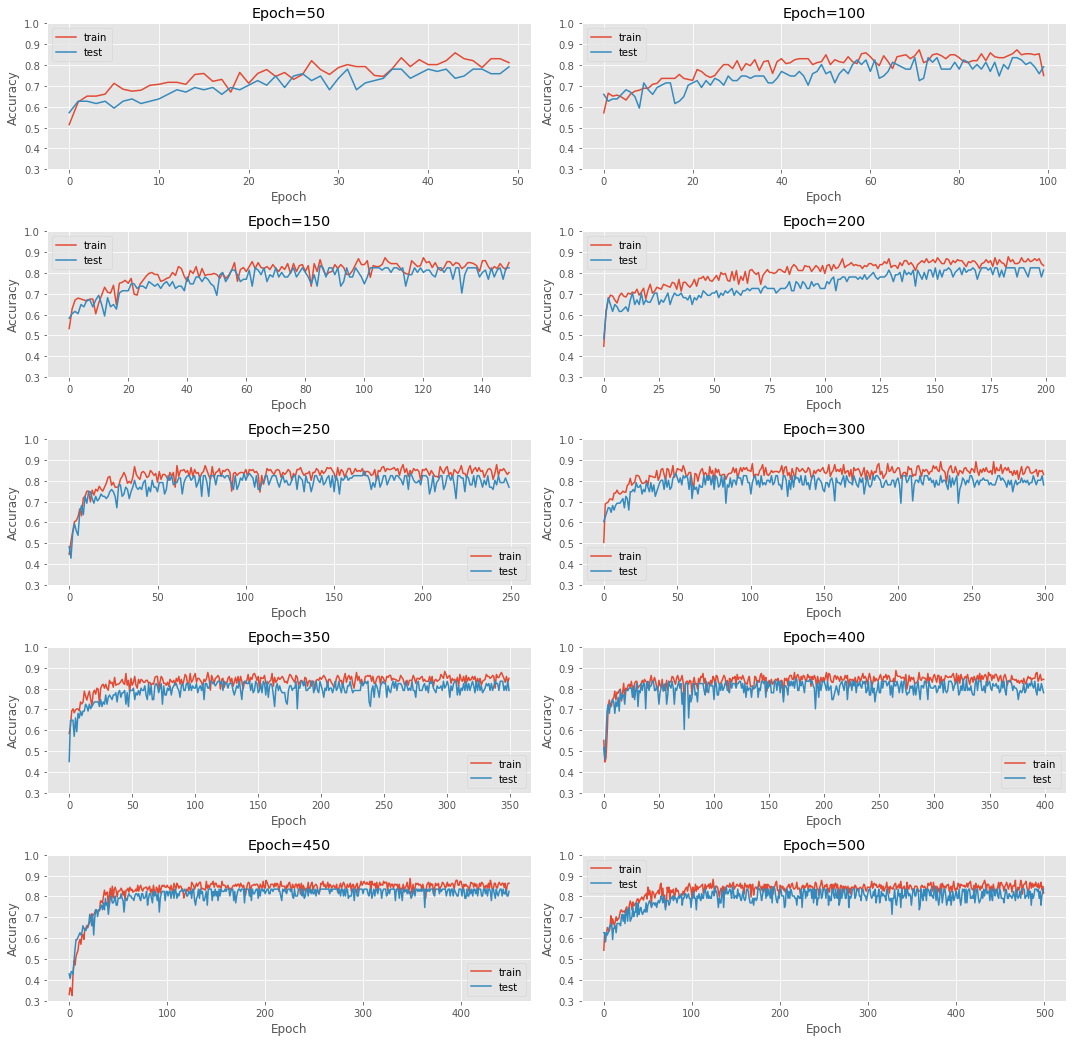

In [20]:
#Epoch experiment
n_epoch = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

plt.figure(figsize=(15,17))

for i in range(len(n_epoch)):
    plt.subplot(6,2, i+1)
    
    model_epoch(X_train, y_train, X_test, y_test, n_epoch[i])

plt.tight_layout()
plt.show()

## Summary Experiment Epoch
Dari experiment variasi epoch dari 50 hingga 500 dapat dilihat bahwa:
1. Semakin besar epoch, maka semakin stabil akurasinya atau tidak volatile.
2. Dari experiment di atas epoch 350 dapat dikatakan paling baik dibanding variasi jumlah epoch lain, karena kurva train dan  test cukup mirip sehingga tidak overfitting/underfitting. Meskipun hasil serupa juga dapat dilihat di epoch 400, 450, dan 500, epoch 350 masih lebih baik karena waktu trainingnya yang lebih cepat.

# 3) Experiment Batch Size

In [21]:
def model_batch_size(X_train, y_train, X_test, y_test, n_batch):
    
    # define model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(8, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=350, 
                        batch_size = n_batch, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Batch Size='+str(n_batch))
    plt.ylim([0.2, 1])

    plt.legend()

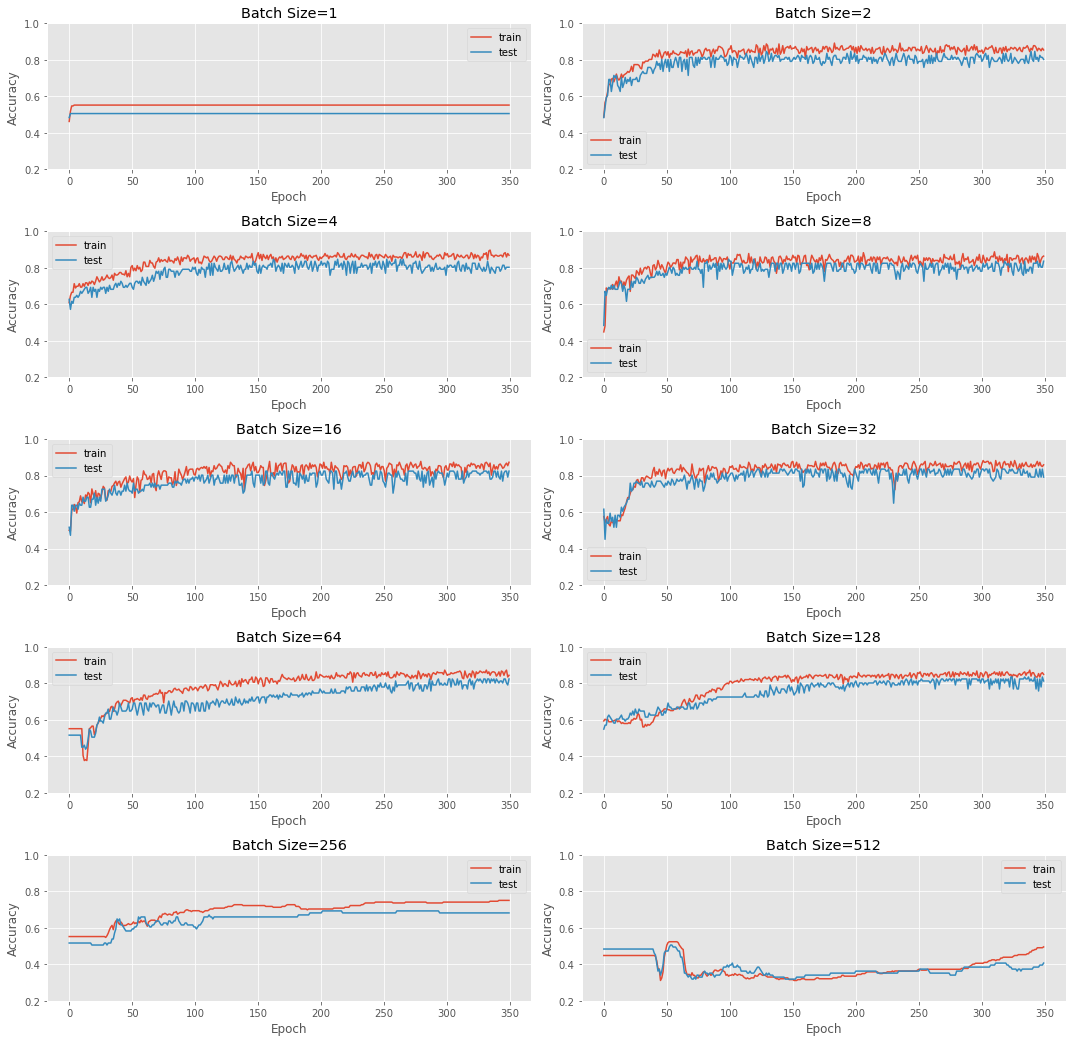

In [22]:
#Epoch experiment
n_batch = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

plt.figure(figsize=(15,17))

for i in range(len(n_epoch)):
    plt.subplot(6,2, i+1)
    
    model_batch_size(X_train, y_train, X_test, y_test, n_batch[i])

plt.tight_layout()
plt.show()

## Summary Experiment Batch Size
Dari experiment variasi batch size dari 1 hingga 512 dapat dilihat bahwa:
1. Dari batch size yang kecil menghasilkan learning rate yang cepat tetapi hasilnya terlihat lebih volatile (high variance accuracy) dibanding batch size yang lebih besar.
2. Sebaliknya, batch size yang lebih besar menghasilkan learning rate yang lebih pelan namun menghasilkan accuracy yang lebih stabil.
3. Dari experiment batch size di atas, batch size 16 dapat kita pilih karena kurva accuracy train & test cukup mirip sehingga tidak overfitting/underfitting. Selain itu juga terlihat lebih stabil dan tidak volatile hasil akurasinya.